In [62]:
# import bibliotek

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline

In [64]:
# wczytanie pliku i zmiana nazw kolumn

df = pd.read_csv('C:/Users/jaros/Desktop/DANE DO UDACITY/1 okrazenie/driving_log.csv', names = ['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,0.0,0.0,0.0,0.000064
1,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,0.0,0.0,0.0,0.000076
2,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,0.0,0.0,0.0,0.000092
3,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,0.0,0.0,0.0,0.000114
4,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,C:\Users\jaros\Desktop\DANE DO UDACITY\1 okr t...,0.0,0.0,0.0,0.000130


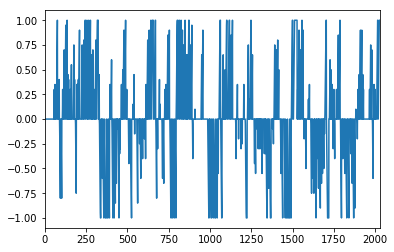

In [65]:
# wyświetlenie wykresu steering angle

df['steering_angle'].plot()

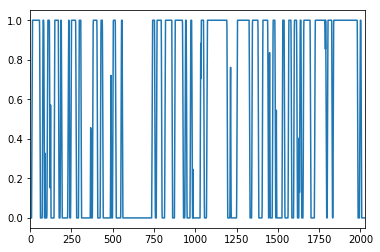

In [66]:
# wyświetlenie wykresu położenia pedału gazu

df['throttle'].plot()

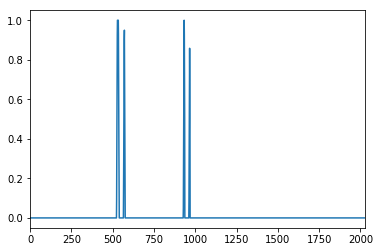

In [67]:
# wyświetlenie wykresu użycia hamulca

df['break'].plot()

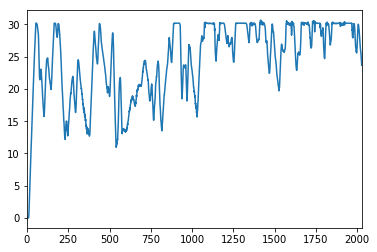

In [68]:
# wyświetlenie wykresu prędkości

df['speed'].plot()

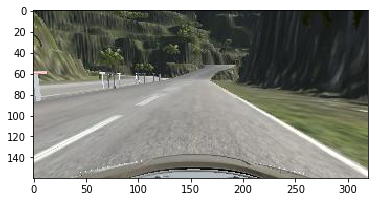

In [69]:
#wyświetlenie obrazu ze środkowej kamery

img = Image.open(df['center'][0])
plt.imshow(img)

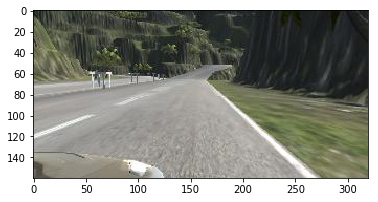

In [70]:
#wyświetlenie obrazu z prawej kamery

img = Image.open(df['right'][0])
plt.imshow(img)

In [71]:
# sprawdzenie rozmiaru zdjęć

img = np.asarray(img)
img.shape

(160, 320, 3)

In [72]:
# zmiana rozmiaru zdjęć

def loadImage(fname):
    return np.asarray(Image.open(fname))

def process_image(img):
    return img[10:130:2, ::4, :]

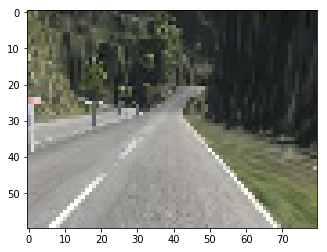

In [73]:
# wyświetlenie zmienionego zdjęcia

img = process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [74]:
# połączenie danych z 3 kamer w jedną tablicę

X4 = [process_image(loadImage(fname)) for fname in df['left']]
X4 += [process_image(loadImage(fname)) for fname in df['center']]
X4 += [process_image(loadImage(fname)) for fname in df['right']]

y4 = np.array(df['steering_angle'])
y4 = np.concatenate([y4, y4+0.4, y4-0.4])

In [75]:
# sprawdzenie ilości danych

X4 = np.array(X4)
print(X4.shape)
print(y4.shape)

(6084, 60, 80, 3)
(6084,)


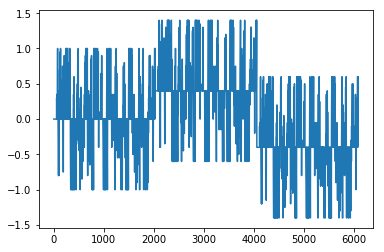

In [76]:
# wyświetlenie kąta skrętu kierownicy

plt.plot(y4)
plt.show();

In [77]:
# zapis zdjęć i steering_angle

np.save('X4.npy', X4)
np.save('y4.npy', y4)